

> Importing required libraries and functions



In [ ]:
import tensorflow as tf 
import pandas as pd 

from tensorflow.keras.datasets.mnist import load_data 
from tensorflow.keras.callbacks import LearningRateScheduler



> Importing the MNIST digit dataset



In [ ]:
(xtrain,ytrain),(xtest,ytest)=load_data(path="mnist.npz")
xtrain=xtrain/255.0
xtest=xtest/255.0;yp=ytrain
xtrain=xtrain.reshape(-1,28,28,1) 

xtest=xtest.reshape(-1,28,28,1)
ytrain=tf.keras.utils.to_categorical(ytrain,num_classes=10)
ytest=tf.keras.utils.to_categorical(ytest,num_classes=10)




> Defining the structure of our model



In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(30, (2,2), activation='relu', input_shape=(28,28,1)),
    
    tf.keras.layers.Conv2D(50, (2,2), padding="same", activation='relu'),
    tf.keras.layers.AveragePooling2D(2),
    tf.keras.layers.Conv2D(70, (2,2), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(100,2,padding="same",activation="relu"),

    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(1024,activation="relu"), 
    
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1024, activation='relu'),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256,activation="sigmoid"),
    
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 27, 27, 30)        150       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 27, 27, 50)        6050      
_________________________________________________________________
average_pooling2d_3 (Average (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 70)        14070     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 70)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 100)         28100     
_________________________________________________________________
flatten_3 (Flatten)          (None, 3600)             



> Compiling and Training the Model



In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=10e-4),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(xtrain,ytrain,epochs=50,verbose=1,steps_per_epoch=150,batch_size=300,callbacks=[LearningRateScheduler(lambda x:1e-3*0.9**x)],validation_data=(xtest,ytest),use_multiprocessing=True)

Epoch 1/50
150/150 [==============================] - 7s 47ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0406 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 7s 46ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0388 - val_accuracy: 0.9893 - lr: 9.0000e-04
Epoch 3/50
150/150 [==============================] - 7s 46ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0318 - val_accuracy: 0.9908 - lr: 8.1000e-04
Epoch 4/50
150/150 [==============================] - 7s 46ms/step - loss: 0.0162 - accuracy: 0.9951 - val_loss: 0.0306 - val_accuracy: 0.9912 - lr: 7.2900e-04
Epoch 5/50
150/150 [==============================] - 7s 46ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0277 - val_accuracy: 0.9917 - lr: 6.5610e-04
Epoch 6/50
150/150 [==============================] - 7s 46ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.0243 - val_accuracy: 0.9926 - lr: 5.9049e-04
Epoch 7/50
150/150 [========================



> Plotting the Confusion Matrix




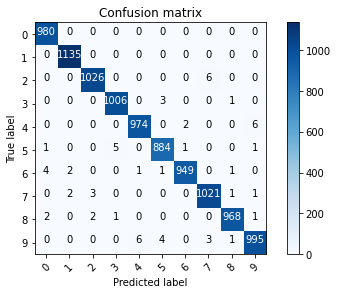

In [ ]:
import itertools
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(xtest)

Y_pred_classes = np.argmax(Y_pred,axis=1) 

Y_true = np.argmax(ytest,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plot_confusion_matrix(confusion_mtx, classes = range(10)) 





> Plotting some of the most signnficant errors



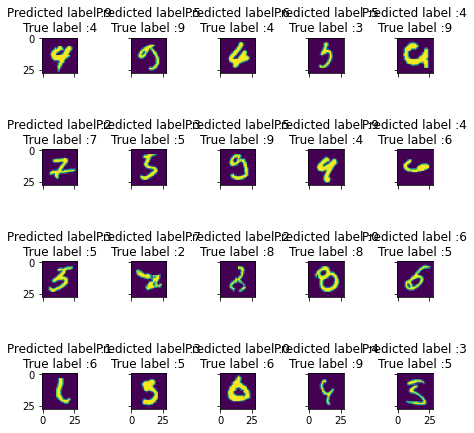

In [ ]:

errors = (Y_pred_classes - Y_true != 0)


Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = xtest[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    
    n = 0
    nrows = 4
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(7,7))
    plt.subplots_adjust(wspace=1.51, hspace=1.51)
    for row in range(nrows):

        for col in range(ncols):
            error = errors_index[n] 
            
            ax[row,col].imshow((img_errors[error]).reshape(28,28))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n +=1
Y_pred_errors_prob = np.max(Y_pred_errors,axis=1)


true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors,axis=1))

delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors


sorted_dela_errors = np.argsort(delta_pred_true_errors)


most_important_errors = sorted_dela_errors[-20:]

display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
